In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv


In [121]:
df=pd.read_csv("/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv")

In [122]:
df.sample(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
2965,SESSION02966,Undergraduate,Math,2025-01-17,15.38,6,Homework Help,3,Idea Drafted,True,2.6
4310,SESSION04311,High School,Business,2025-04-03,51.28,12,Homework Help,4,Assignment Completed,False,3.6
9575,SESSION09576,Graduate,Computer Science,2024-12-20,17.91,3,Studying,5,Idea Drafted,True,5.0
9128,SESSION09129,Undergraduate,Biology,2025-02-22,2.73,1,Studying,3,Confused,False,2.3
1218,SESSION01219,Undergraduate,Math,2025-02-14,31.76,8,Coding,2,Assignment Completed,True,1.5


In [123]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [125]:
df['UsedAgain'].value_counts()

UsedAgain
True     7064
False    2936
Name: count, dtype: int64

In [126]:
 df['StudentLevel'].value_counts()

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

In [127]:
df['FinalOutcome'].value_counts()

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64

In [128]:
df['Discipline'].value_counts()

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64

In [129]:
df.shape

(10000, 11)

In [130]:
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [131]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns


(array([7934., 1732.,  269.,   54.,   11.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. ]),
 <BarContainer object of 5 artists>)

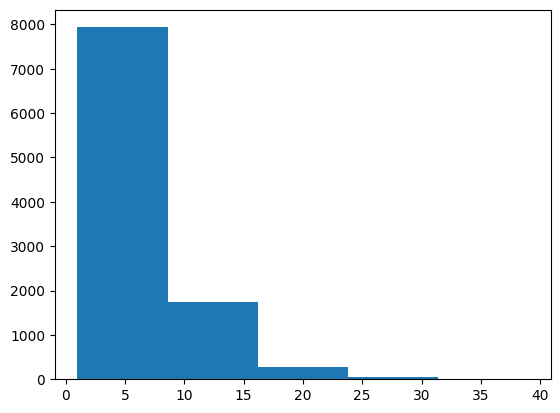

In [133]:
plt.hist(df["TotalPrompts"],bins=5)

(array([ 964., 1437., 2452., 2049., 3098.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

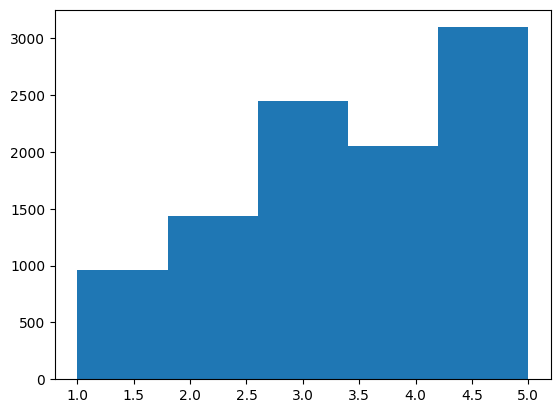

In [134]:
plt.hist(df["SatisfactionRating"],bins=5)

3.413867514218803

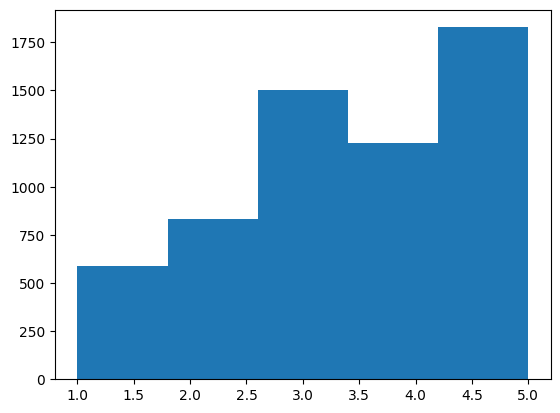

In [135]:
undergradrating=df[df['StudentLevel']=='Undergraduate']['SatisfactionRating']
plt.hist(undergradrating,bins=5)
undergradrating.mean()

In [136]:
df.sample(2)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
234,SESSION00235,Undergraduate,Psychology,2024-08-03,15.21,7,Writing,2,Assignment Completed,True,1.1
7148,SESSION07149,Graduate,Biology,2024-07-04,5.63,1,Homework Help,3,Assignment Completed,True,2.1


5.787468671679198

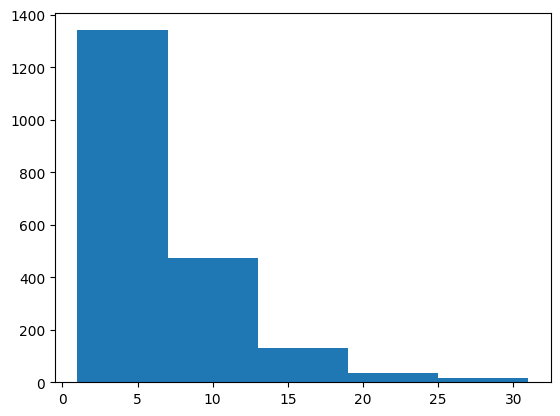

In [137]:
Graduateprompt=df[df['StudentLevel']=='Graduate']['TotalPrompts']
plt.hist(Graduateprompt,bins=5)
Graduateprompt.mean()

<Axes: xlabel='StudentLevel', ylabel='count'>

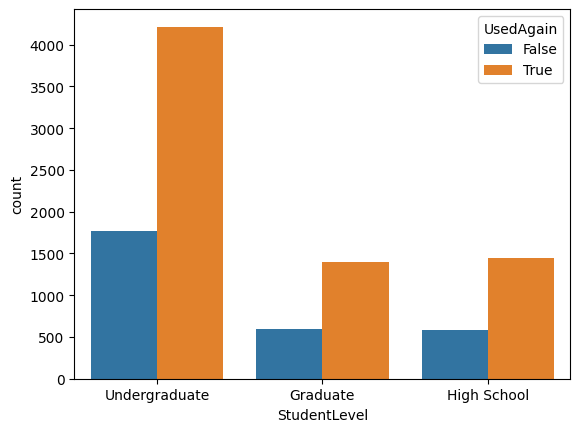

In [138]:

 
sns.countplot(data=df,x='StudentLevel',hue='UsedAgain')

In [139]:
df.sample(10)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
7838,SESSION07839,Graduate,Math,2025-01-26,21.48,6,Coding,4,Confused,True,4.7
8486,SESSION08487,Undergraduate,Math,2025-04-25,19.88,5,Homework Help,5,Assignment Completed,False,4.8
8302,SESSION08303,High School,Psychology,2024-10-24,16.15,4,Studying,5,Gave Up,False,5.0
7423,SESSION07424,Undergraduate,Computer Science,2024-08-26,14.95,3,Studying,5,Assignment Completed,True,4.5
3354,SESSION03355,Undergraduate,Computer Science,2025-01-21,37.17,9,Homework Help,3,Assignment Completed,True,2.7
7604,SESSION07605,Undergraduate,Business,2024-11-16,31.65,11,Homework Help,4,Assignment Completed,False,5.0
5026,SESSION05027,High School,History,2024-07-16,38.31,10,Writing,5,Idea Drafted,True,5.0
4954,SESSION04955,Graduate,Computer Science,2025-03-31,39.66,8,Studying,1,Assignment Completed,True,1.8
6535,SESSION06536,High School,Business,2025-01-03,15.04,4,Studying,5,Gave Up,True,4.9
703,SESSION00704,High School,Computer Science,2024-08-24,5.34,1,Studying,2,Confused,True,2.1


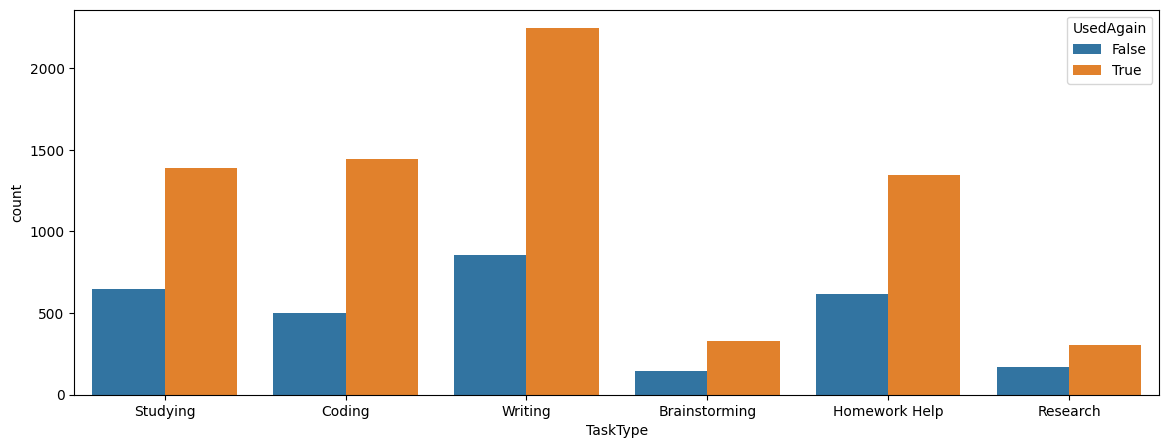

In [140]:
plt.figure(figsize=(14,5))
sns.countplot(data=df,x='TaskType',hue='UsedAgain')
 
plt.show()

In [141]:
from ydata_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 12.31it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

(array([5.207e+03, 2.727e+03, 1.234e+03, 4.980e+02, 1.630e+02, 1.060e+02,
        3.600e+01, 1.800e+01, 5.000e+00, 6.000e+00]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ]),
 <BarContainer object of 10 artists>)

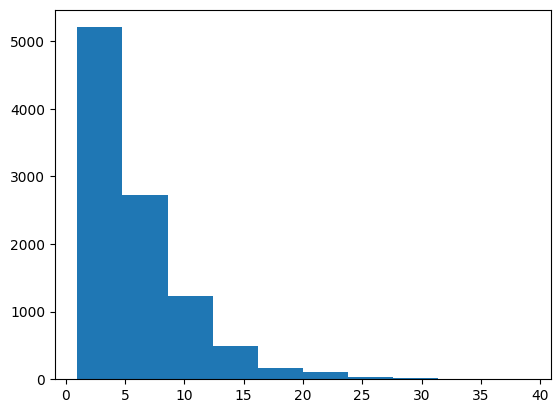

In [142]:
plt.hist(df['TotalPrompts'])

<Axes: xlabel='StudentLevel', ylabel='TotalPrompts'>

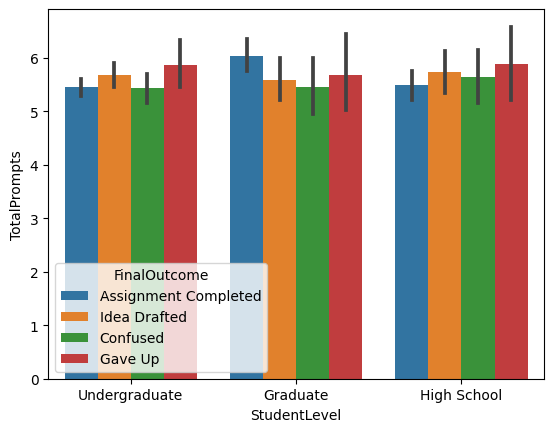

In [143]:
sns.barplot(data=df, x='StudentLevel', y='TotalPrompts',hue='FinalOutcome')

In [144]:
df['FinalOutcome'].value_counts()

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64

<Axes: ylabel='SatisfactionRating'>

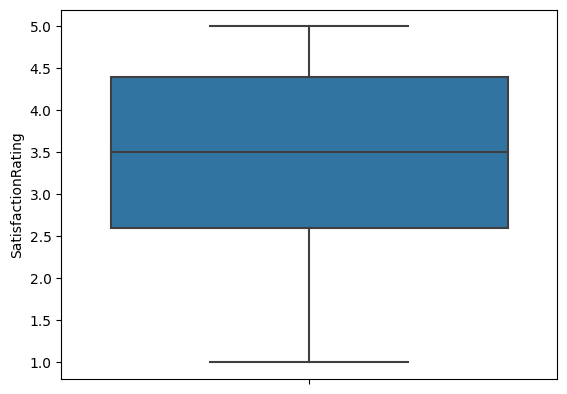

In [145]:
sns.boxplot(data=df,y='SatisfactionRating')

In [146]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

(array([ 241., 1356., 3361., 3451., 1591.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

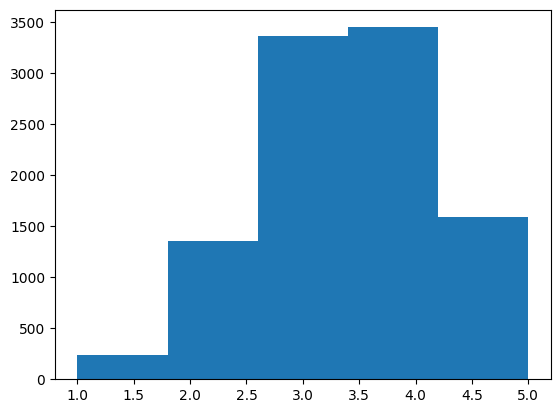

In [147]:
plt.hist(df['AI_AssistanceLevel'],bins=5)

In [148]:
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3


In [165]:
"""A survey conducted on 10,000 students from High School,
Undergraduate, and Graduate levels revealed that the overall recommendation rate for AI assistance remains
consistent across all groups, with an average of 3.4 out of 5. This indicates a strong preference for using AI in 
academic tasks. Among the participants, 5,978 were undergraduates, 2,027 were high school students, and 1,995 were
graduate students. Most students were able to complete their assignments using just 5–6 prompts, and they reported 
that AI was useful across almost all subjects. Surprisingly, a significant number of students managed to complete 
their work using just one prompt.
Very few students gave up before completing their tasks. The majority preferred using 3–4 levels of AI assistance,
and over 70% expressed a desire to use AI tools again in the future."""

'A survey conducted on 10,000 students from High School,\nUndergraduate, and Graduate levels revealed that the overall recommendation rate for AI assistance remains\nconsistent across all groups, with an average of 3.4 out of 5. This indicates a strong preference for using AI in \nacademic tasks. Among the participants, 5,978 were undergraduates, 2,027 were high school students, and 1,995 were\ngraduate students. Most students were able to complete their assignments using just 5–6 prompts, and they reported \nthat AI was useful across almost all subjects. Surprisingly, a significant number of students managed to complete \ntheir work using just one prompt.\nVery few students gave up before completing their tasks. The majority preferred using 3–4 levels of AI assistance,\nand over 70% expressed a desire to use AI tools again in the future.'